# 퍼셉트론 (2)

## 1. 퍼셉트론 구현하기 (XOR 게이트)

### 1) 패키지 참조하기

In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas import DataFrame

from tensorflow.keras.models import Sequential  # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense       # 모델 객체에 학습층을 쌓기 위한 클래스
from tensorflow.keras.optimizers import RMSprop # 옵티마이저
from tensorflow.keras.losses import mse         # 활성화 함수

### 2) 데이터셋 준비하기
- 랜덤 시드값 고정

In [2]:
np.random.seed(777)

- 데이터셋 구성
    - `XOR 회로`는 입력값이 동일한 경우 `False`, 입력값이 서로 다른 경우 `True`를 반환한다.

In [3]:
train_x = np.array([[0,0], [1,0], [0,1], [1,1]])
train_y = np.array([[0], [1], [1], [0]])

### 3) 데이터 전처리
> 간단한 데이터이므로 이 예제에서는 수행하지 않는다
- 이 때 결측치 등을 확인할 수 있다
    - `데이터프레임.isna().sum()`
### 4) 탐색적 데이터 분석
- `flatten`: 무조건 1차원으로 풀어버린다

In [4]:
label = train_y.flatten()
df = DataFrame(train_x, label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
0,1,1


### 5) 데이터셋 분할
> 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 이 예제에서는 진행하지 않는다.

### 6) 모델 개발
- 모델 정의

In [5]:
my_model = Sequential()
# 층이 1, 2인 경우 정확도 50%
# 층이 8인 경우 정확도 75%
# 층이 16, 32인 경우 정확도 100%
my_model.add(Dense(16, input_shape = (2,), activation = 'relu'))
my_model.add(Dense(1, activation = 'sigmoid'))
my_model.compile(optimizer = RMSprop(), loss=mse, metrics=['acc'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 학습하기

In [6]:
my_hist = my_model.fit(train_x, train_y, epochs=500)

result_df = DataFrame(my_hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
1/1 [==============================] - 0s 214ms/step - loss: 0.2562 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2542 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2527 - acc: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2514 - acc: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2503 - acc: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2494 - acc: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2484 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2476 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2467 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2460 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.245

,loss,acc
epochs,,
1,0.256181,0.75
2,0.254167,0.50
3,0.252657,0.75
4,0.251414,0.75
5,0.250321,0.75
...,...,...
496,0.067507,1.00
497,0.067298,1.00
498,0.067129,1.00


### 7) 학습 결과 평가
- 학습 결과 시각화

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

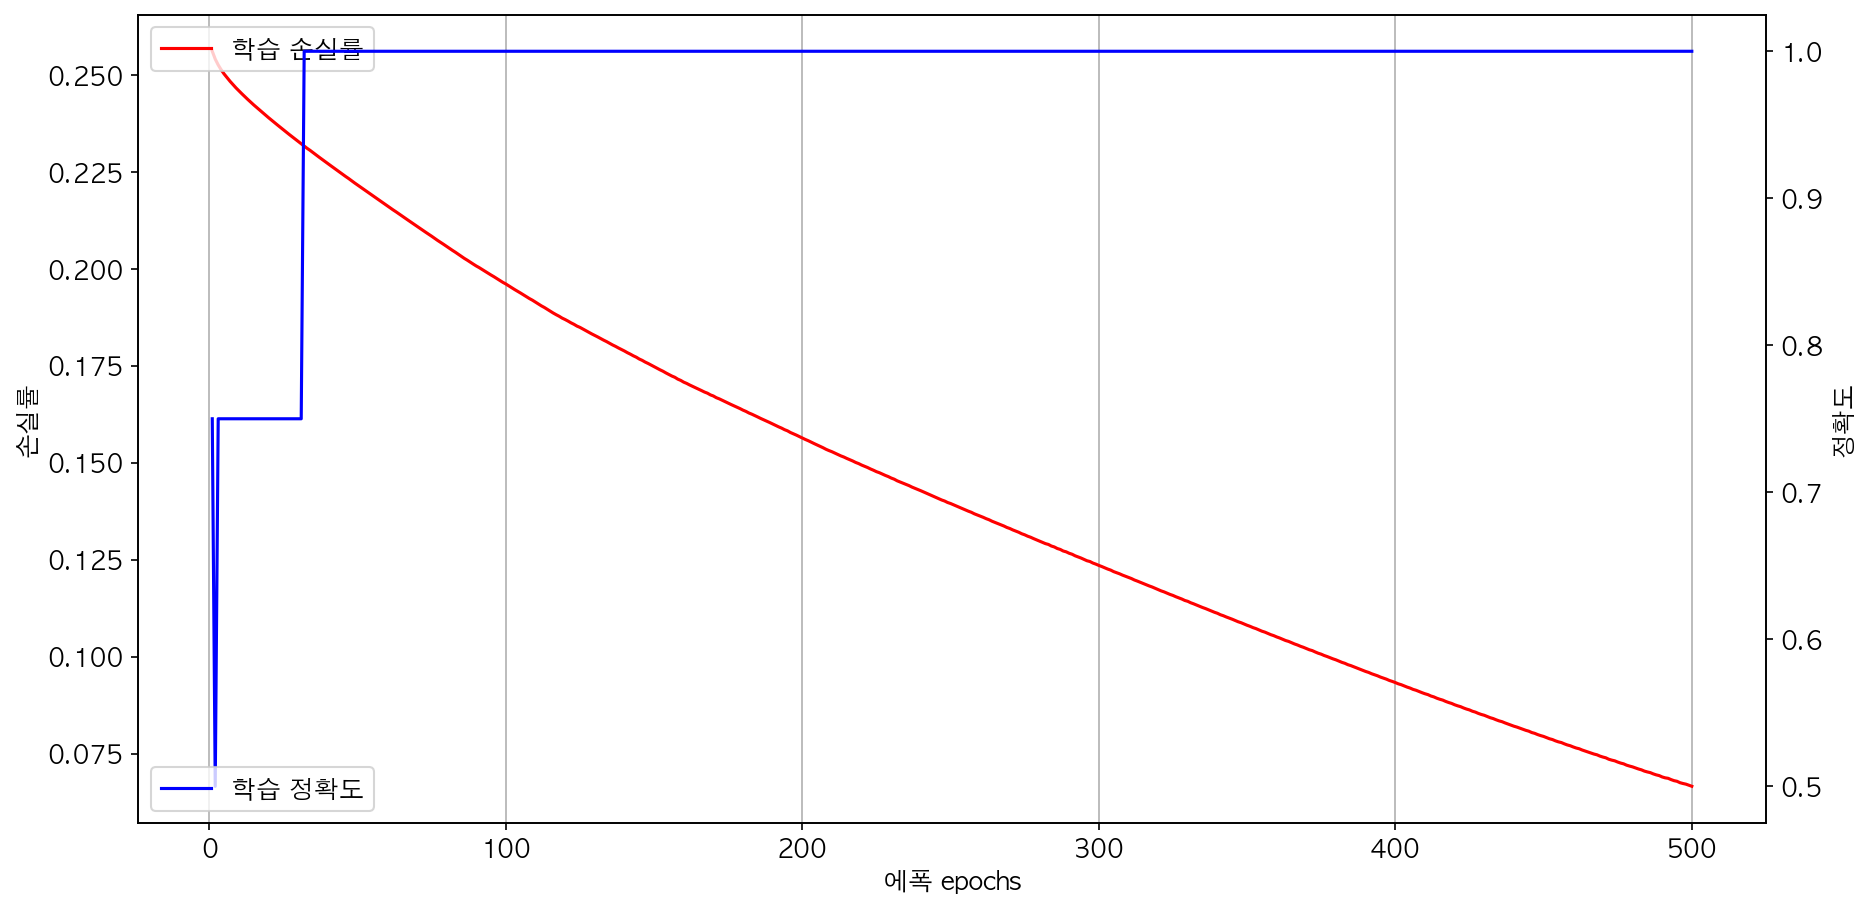

In [7]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12

fig, ax1 = plt.subplots(1,1,figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(x=result_df.index,
             y='loss',
             data=result_df,
             color='red',
             label='학습 손실률',
             ax=ax1)
ax1.set_xlabel('에폭 epochs')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(x=result_df.index,
             y='acc',
             data=result_df,
             color='blue',
             label='학습 정확도',
             ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

- 모델 성능 평가
    - `모델객체.evaluate(독립변수데이터, 종속변수데이터)`

In [8]:
ev = my_model.evaluate(train_x, train_y)
print('손실률: %0.2f, 정확도: %0.2f' % (ev[0], ev[1]))

1/1 [==============================] - 0s 68ms/step - loss: 0.0664 - acc: 1.0000
손실률: 0.07, 정확도: 1.00


- 가중치, 편향 확인
    - `모델객체.get_weights()`

In [9]:
weights = my_model.get_weights()
weights

[array([[ 0.43080443, -0.5939823 ,  0.71325207, -0.5268165 ,  0.35816386,
          0.6645787 , -0.38960886,  0.7299421 ,  0.20690617,  0.04550583,
         -0.59046525,  0.8513515 , -0.24892536,  0.0925882 ,  0.6567877 ,
          0.1625995 ],
        [ 0.4302176 ,  0.5932063 , -0.7143088 ,  0.5263254 ,  0.35749367,
         -0.6637005 , -0.55893904, -0.7304542 ,  0.30033565,  0.541835  ,
          0.6291061 , -0.84997946,  0.12353094, -0.2071509 , -0.34545693,
         -0.4805348 ]], dtype=float32),
 array([-4.3004769e-01, -1.2827045e-03, -1.0149830e-03, -9.3256164e-04,
        -3.5765633e-01,  6.9031003e-04,  0.0000000e+00, -1.0902605e-03,
        -6.8998971e-04,  7.4868422e-04, -1.6803624e-03, -2.2070121e-04,
        -1.2385665e-01, -9.3726523e-02,  4.9246803e-01, -1.6407707e-01],
       dtype=float32),
 array([[-0.9631469 ],
        [ 0.887146  ],
        [ 0.7589516 ],
        [ 1.0540714 ],
        [-0.6542765 ],
        [ 0.9980353 ],
        [-0.58062184],
        [ 0.86683995

In [10]:
# 2차원 배열 - 입력층과 은닉층을 연결하는 가중치
print(weights[0].shape)

# 1차원 배열 - 은닉층의 편향
print(weights[1].shape)

# 2차원 배열 - 은닉층와 출력층을 연결하는 가중치
print(weights[2].shape)

# 1차원 배열 - 출력층의 편향
print(weights[3].shape)

(2, 16)
(16,)
(16, 1)
(1,)


### 8) 학습 결과 적용

In [11]:
r = my_model.predict(train_x)
df['예측값'] = r.reshape(-1).round()
df

1/1 [==============================] - 0s 50ms/step


,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
0,1,1,0.0
